In [128]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from scipy.optimize import linear_sum_assignment
import itertools

def make_name(parameters):
    return "_".join(parameters[0]) + "_" + "_".join(parameters[1])


def read_from(r, parameter_sets, state_cutoff=10 ,w0=0.7):
    data = []
    norm = np.var(pd.read_csv(f"ai_data/{r}.csv"), axis=0)
    ai_df = pd.read_csv(f"ai_data/{r}.csv")
    for parameters in parameter_sets:
        for i in range(10):
            pname = make_name(parameters)
            fname = f"model_data_{state_cutoff}_{w0}/{pname}_{i}_{r}.hdf5"
            if not os.path.exists(fname):
                continue
            with h5py.File(fname, 'r') as f:
                print(fname)
                ntest = f['nstates_test'][()]
                ntrain = f['nstates_train'][()]
                distance = f["distance"][:]
                test_states = f["state_ind_for_test"][:]
                row_ind, col_ind = linear_sum_assignment(distance)
                row_ind = row_ind[:ntest+ntrain]
                col_ind = col_ind[:ntest+ntrain]
                better_test_loss = np.sqrt(np.mean((ai_df['energy'].values[test_states] - f['train/descriptors/energy'][()][col_ind[test_states]])**2))
                energy_loss = np.sqrt(np.mean( (ai_df['energy'].values[row_ind] - f['train/descriptors/energy'][()][col_ind])**2))
                for i, (row, col) in enumerate(zip(row_ind, col_ind)):
                    data.append({
                    'name': pname,
                    'Parameters':pname.replace("_", ",").replace("E0,", ""),
                    'cviteration': i,
                    'test_sloss': f['test_sloss'][()],
                    'test_loss': f['test_loss'][()]/3,
                    'Energy test rms error (eV)':27.2114*better_test_loss,
                    'Test loss': better_test_loss,
                    'train_sloss': f['train_sloss'][()]*norm['energy']/ntrain,
                    'train_loss': f['train_loss'][()]/2,
                    'energy_loss': energy_loss,
                    'state': i,
                    'ai_energy':ai_df['energy'].values[row],
                    'model_energy':f['train/descriptors/energy'][()][col],
                    't': f['rdmd_params/t'][()],
                    'U': f['rdmd_params/U'][()],
                })
    df = pd.DataFrame(data)
    df['r'] = float(r[1:])
    df['w0'] = w0
    df['state_cutoff'] = state_cutoff
    return df


parameter_sets = [
        (['E0', 't'], ['U']),
    ]

df = pd.concat(
    [
        read_from(r, parameter_sets, 10, w0) for r,w0  in itertools.product(["r2.4", "r2.6", "r2.8", "r3.0", "r3.2", "r3.4", "r3.6", "r3.8", "r4.0", "r4.4", "r4.8", "r5.0"],
                                                                         [0.6,0.7, 0.8, 0.9,1.0])

    ]
)

df


model_data_10_0.6/E0_t_U_0_r2.4.hdf5
model_data_10_0.6/E0_t_U_1_r2.4.hdf5
model_data_10_0.6/E0_t_U_2_r2.4.hdf5
model_data_10_0.6/E0_t_U_3_r2.4.hdf5
model_data_10_0.6/E0_t_U_4_r2.4.hdf5
model_data_10_0.6/E0_t_U_5_r2.4.hdf5
model_data_10_0.6/E0_t_U_6_r2.4.hdf5
model_data_10_0.6/E0_t_U_7_r2.4.hdf5
model_data_10_0.6/E0_t_U_8_r2.4.hdf5
model_data_10_0.6/E0_t_U_9_r2.4.hdf5
model_data_10_0.7/E0_t_U_0_r2.4.hdf5
model_data_10_0.7/E0_t_U_1_r2.4.hdf5
model_data_10_0.7/E0_t_U_2_r2.4.hdf5
model_data_10_0.7/E0_t_U_3_r2.4.hdf5
model_data_10_0.7/E0_t_U_4_r2.4.hdf5
model_data_10_0.7/E0_t_U_5_r2.4.hdf5
model_data_10_0.7/E0_t_U_6_r2.4.hdf5
model_data_10_0.7/E0_t_U_7_r2.4.hdf5
model_data_10_0.7/E0_t_U_8_r2.4.hdf5
model_data_10_0.7/E0_t_U_9_r2.4.hdf5
model_data_10_0.8/E0_t_U_0_r2.4.hdf5
model_data_10_0.8/E0_t_U_1_r2.4.hdf5
model_data_10_0.8/E0_t_U_2_r2.4.hdf5
model_data_10_0.8/E0_t_U_3_r2.4.hdf5
model_data_10_0.8/E0_t_U_4_r2.4.hdf5
model_data_10_0.8/E0_t_U_5_r2.4.hdf5
model_data_10_0.8/E0_t_U_6_r2.4.hdf5
m

,name,Parameters,cviteration,test_sloss,test_loss,Energy test rms error (eV),Test loss,train_sloss,train_loss,energy_loss,state,ai_energy,model_energy,t,U,r,w0,state_cutoff
0,E0_t_U,"t,U",0.0,0.012524,0.102588,0.339347,0.012471,0.000015,1.743986,0.005525,0.0,-2.103493,-2.091022,-0.112533,0.162226,2.4,0.6,10
1,E0_t_U,"t,U",1.0,0.012524,0.102588,0.339347,0.012471,0.000015,1.743986,0.005525,1.0,-2.100452,-2.100887,-0.112533,0.162226,2.4,0.6,10
2,E0_t_U,"t,U",2.0,0.012524,0.102588,0.339347,0.012471,0.000015,1.743986,0.005525,2.0,-2.024963,-2.027362,-0.112533,0.162226,2.4,0.6,10
3,E0_t_U,"t,U",3.0,0.012524,0.102588,0.339347,0.012471,0.000015,1.743986,0.005525,3.0,-2.011959,-2.007361,-0.112533,0.162226,2.4,0.6,10
4,E0_t_U,"t,U",4.0,0.012524,0.102588,0.339347,0.012471,0.000015,1.743986,0.005525,4.0,-1.909743,-1.910256,-0.112533,0.162226,2.4,0.6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,E0_t_U,"t,U",5.0,0.000187,0.000062,0.068423,0.002515,0.000024,0.004325,0.005465,5.0,-1.991779,-1.991322,-0.018389,0.303135,4.8,1.0,10
96,E0_t_U,"t,U",6.0,0.000187,0.000062,0.068423,0.002515,0.000024,0.004325,0.005465,6.0,-1.758797,-1.744100,-0.018389,0.303135,4.8,1.0,10
97,E0_t_U,"t,U",7.0,0.000187,0.000062,0.068423,0.002515,0.000024,0.004325,0.005465,7.0,-1.734405,-1.735184,-0.018389,0.303135,4.8,1.0,10
98,E0_t_U,"t,U",8.0,0.000187,0.000062,0.068423,0.002515,0.000024,0.004325,0.005465,8.0,-1.724975,-1.724963,-0.018389,0.303135,4.8,1.0,10


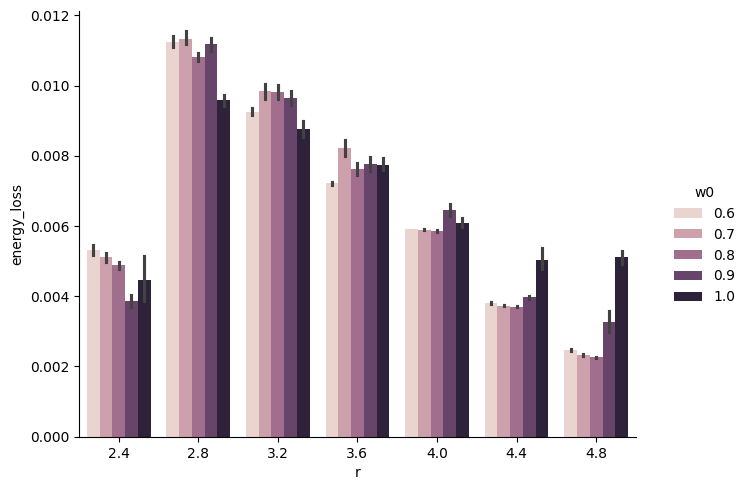

In [129]:
g= sns.catplot(data=df, x='r', y='energy_loss', kind='bar', hue = 'w0')
g.fig.set_figwidth(8)

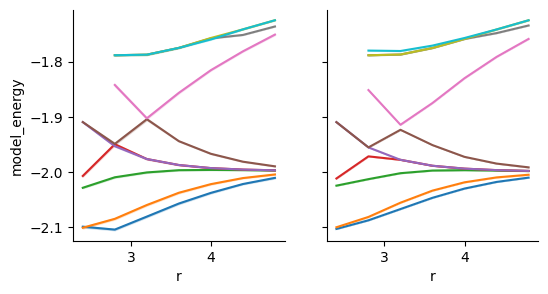

In [130]:
df['state'] = pd.Categorical(df['state'])
fig, ax = plt.subplots(1,2, figsize=(6,3), sharey=True)
sns.lineplot(data=df, x='r', y='model_energy', hue='state', ax=ax[0], legend = False)
sns.lineplot(data=df, x='r', y='ai_energy', hue='state', ax=ax[1],legend=False )
sns.despine()
plt.savefig("model_vs_ai_energy.pdf", bbox_inches='tight', transparent=True)

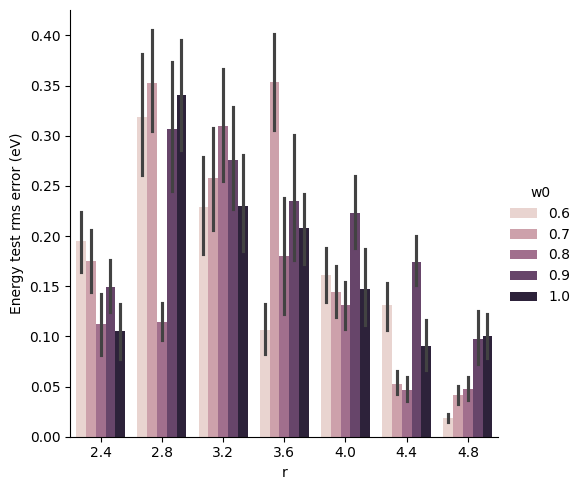

In [131]:
g= sns.catplot(data=df, x='r', y='Energy test rms error (eV)', kind='bar', hue = 'w0')
g.fig.set_figwidth(6)
plt.savefig("w0_test.pdf", bbox_inches='tight', transparent=True)

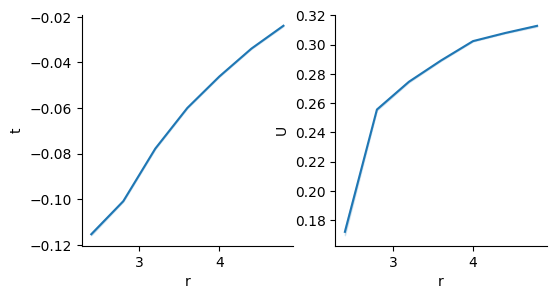

In [132]:
fig, ax = plt.subplots(1,2, figsize=(6,3), sharey=False)
sns.lineplot(data=df, x='r', y='t', ax=ax[0], legend = False)
sns.lineplot(data=df, x='r', y='U', ax=ax[1],legend=False )
sns.despine()
plt.savefig("t_U_vsr.pdf", bbox_inches='tight', transparent=True)